In [1]:
# %matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path
import skimage.external.tifffile as tiff

from common import Statistics, dataset_source
from resources.conv_learner import *
from resources.plots import *
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
PATH = "datasets/Kaggle_HPA_2018/"
data_path = Path(PATH)

In [4]:
NUM_CLASSES = 27
bs = 64
sz = [1,224,224]

In [6]:
# setting up a list of a random 20% of images in train as the validation set

lbl_csv = PATH + 'train_10perc_v2.csv'
n = len(list(open(lbl_csv))) -1
val_idxs = get_cv_idxs(n)

In [7]:
def get_data(path, lbl_csv, val_idxs, sz, bs, aug_tfms):
    
    augs = [RandomDihedral()
           ]

    tfms = tfms_with_IntNorm(sz, aug_tfms=aug_tfms, crop_type=CropType.CENTER)
    data = ImageClassifierData.from_csv(PATH, 'rand_10perc_v2_all_chan', lbl_csv, val_idxs = val_idxs,tfms=tfms, bs=bs, suffix = '.tiff')
    
    return data

In [9]:
augs = [RandomDihedral()]

# initialize data object
data = get_data(PATH, lbl_csv, val_idxs, sz, bs, aug_tfms = augs)

In [10]:
data.__dict__.keys()

dict_keys(['path', 'bs', 'num_workers', 'classes', 'trn_dl', 'val_dl', 'fix_dl', 'aug_dl', 'test_dl', 'test_aug_dl'])

In [11]:
x, y = next(iter(data.trn_dl))

In [12]:
x.shape, y.shape

(torch.Size([64, 4, 224, 224]), torch.Size([64, 27]))


 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
[torch.cuda.FloatTensor of size 27 (GPU 0)]



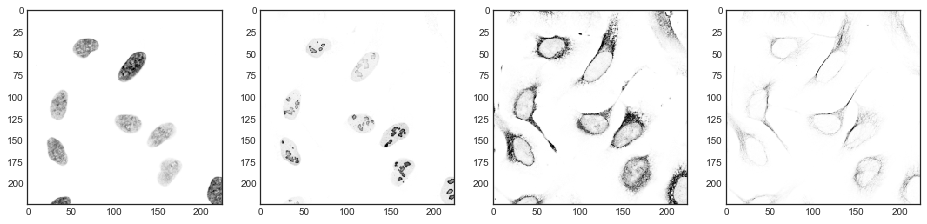

In [13]:
# inspect images
plt.style.use('seaborn-white')

idx = 2

print(y[idx])
im = to_np(x)[idx]

fig, ax = plt.subplots(1,4, figsize=(16,10))
for i, ax in enumerate(ax.flat):
    ax.imshow(im[i])

In [ ]:
# List of label identities:

cell_location_label = {
0:  'Nucleoplasm',
1:  'Nuclear membrane',
2:  'Nucleoli',   
3:  'Nucleoli fibrillar center',
4:  'Nuclear speckles',
5:  'Nuclear bodies',
6:  'Endoplasmic reticulum',   
7:  'Golgi apparatus',
8:  'Peroxisomes',
9:  'Endosomes',
10:  'Lysosomes',
11:  'Intermediate filaments',
12:  'Actin filaments',
13:  'Focal adhesion sites',   
14:  'Microtubules',
15:  'Microtubule ends',  
16:  'Cytokinetic bridge',   
17:  'Mitotic spindle',
18:  'Microtubule organizing center',  
19:  'Centrosome',
20:  'Lipid droplets',
21:  'Plasma membrane',   
22:  'Cell junctions', 
23:  'Mitochondria',
24:  'Aggresome',
25:  'Cytosol',
26:  'Cytoplasmic bodies',   
27:  'Rods & rings' }

In [ ]:
arch = resnet18_c
learn = ConvLearner.pretrained(arch, data, ps=0.25, opt_fn=optim.Adam, pretrained=False)
learn.unfreeze()